<a href="https://colab.research.google.com/github/AmnaShaheena/Bioinformatics-CSH4123-Practical/blob/main/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
DNA_seq='ATGTCCTTTTTATCG'

In [2]:
def comp_dna(seq):
    c_map=str.maketrans("ATGC","TACG")
    c_dna=seq.translate(c_map)
    return c_dna

In [3]:
c_dna=comp_dna(DNA_seq)
c_dna

'TACAGGAAAAATAGC'

In [4]:
def dna_to_rna(seq):
    mrna_seq=c_dna.replace("T","U")
    return mrna_seq

mRNA_seq=dna_to_rna(c_dna)
mRNA_seq

'UACAGGAAAAAUAGC'

In [5]:
def split_into_codons(mrna_seq):
    codons=[mrna_seq[i:i+3] for i in range(0,len(mrna_seq),3)
          if len(mrna_seq[i:i+3])==3]
    return codons

codons=split_into_codons(mRNA_seq)
codons

['UAC', 'AGG', 'AAA', 'AAU', 'AGC']

In [6]:
codon_table = {
    'UUU': 'F', 'UUC': 'F', 'UUA': 'L', 'UUG': 'L',
    'UCU': 'S', 'UCC': 'S', 'UCA': 'S', 'UCG': 'S',
    'UAU': 'Y', 'UAC': 'Y', 'UAA': 'Stop', 'UAG': 'Stop',
    'UGU': 'C', 'UGC': 'C', 'UGA': 'Stop', 'UGG': 'W',
    'CUU': 'L', 'CUC': 'L', 'CUA': 'L', 'CUG': 'L',
    'CCU': 'P', 'CCC': 'P', 'CCA': 'P', 'CCG': 'P',
    'CAU': 'H', 'CAC': 'H', 'CAA': 'Q', 'CAG': 'Q',
    'CGU': 'R', 'CGC': 'R', 'CGA': 'R', 'CGG': 'R',
    'AUU': 'I', 'AUC': 'I', 'AUA': 'I', 'AUG': 'M',
    'ACU': 'T', 'ACC': 'T', 'ACA': 'T', 'ACG': 'T',
    'AAU': 'N', 'AAC': 'N', 'AAA': 'K', 'AAG': 'K',
    'AGU': 'S', 'AGC': 'S', 'AGA': 'R', 'AGG': 'R',
    'GUU': 'V', 'GUC': 'V', 'GUA': 'V', 'GUG': 'V',
    'GCU': 'A', 'GCC': 'A', 'GCA': 'A', 'GCG': 'A',
    'GAU': 'D', 'GAC': 'D', 'GAA': 'E', 'GAG': 'E',
    'GGU': 'G', 'GGC': 'G', 'GGA': 'G', 'GGG': 'G'
}

In [7]:
def translate_to_aminoacids(codons):
    aminoa="".join(codon_table.get(codon,"?") for codon in codons)
    return aminoa

amino_acid=translate_to_aminoacids(codons)
amino_acid

'YRKNS'

In [8]:
seq1='ATGTCCTTTTTATCG'
seq2='ATGTACTTTTTATCG'
seq3='GTGTGTACGATATCA'

def identity(seq1,seq2):
    match=sum(1 for a,b in zip(seq1,seq2) if a==b)
    return match,round(match/len(seq1)*100,2)

id1=identity(seq1,seq2)
id1



(14, 93.33)

In [9]:
id2=identity(seq1,seq3)
id2

(7, 46.67)

In [10]:
sub_dna=seq1[:3]+"G"+seq1[4:]
sub_dna

'ATGGCCTTTTTATCG'

In [11]:
del_dna=seq1[:3]+seq1[4:]
del_dna

'ATGCCTTTTTATCG'

In [12]:
ins_dna=seq1[:5]+"A"+seq1[5:]
ins_dna

'ATGTCACTTTTTATCG'

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


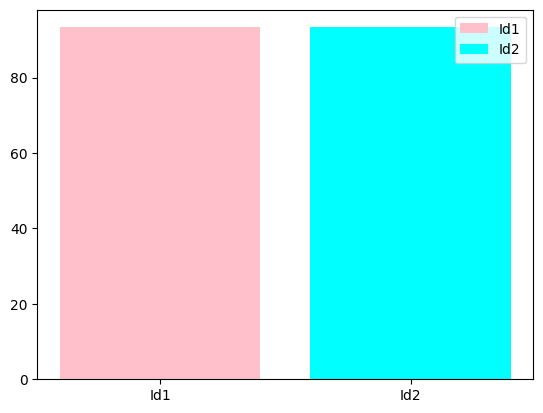

In [14]:
plt.bar("Id1",id1,color='Pink',label='Id1')
plt.bar("Id2",id1,color='Cyan',label='Id2')
plt.legend()
plt.show()

/tmp/ipython-input-264449062.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


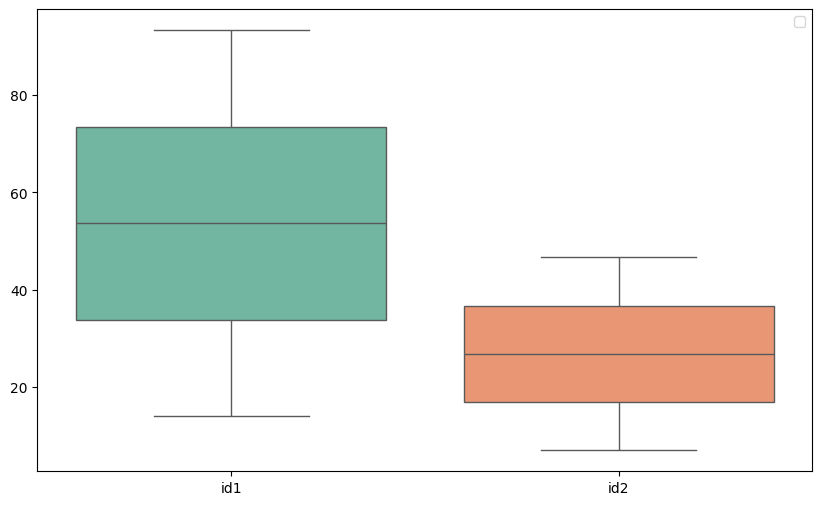

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(data=[id1,id2],palette='Set2')
plt.xticks([0,1],['id1','id2'])
plt.legend()
plt.show()

<AxesSubplot:>

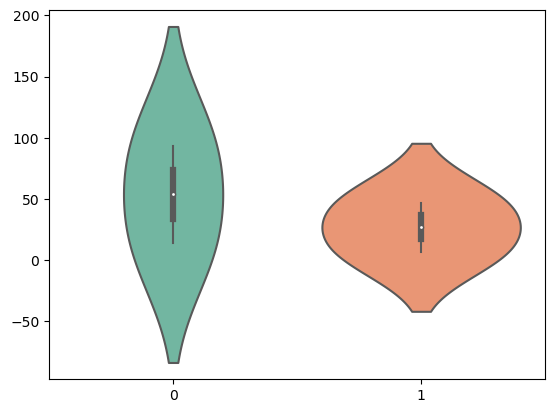

In [ ]:
sns.violinplot(data=[id1,id2],palette='Set2')

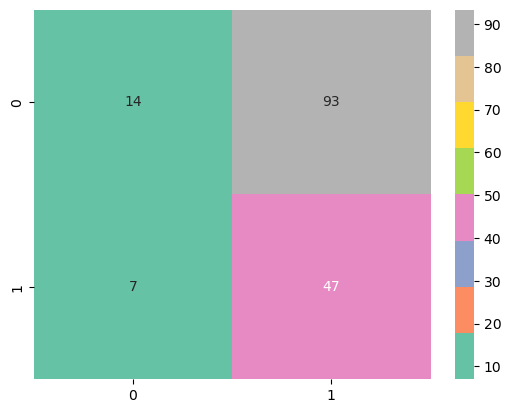

In [ ]:
sns.heatmap([id1,id2],annot=True,cmap='Set2')
plt.show()

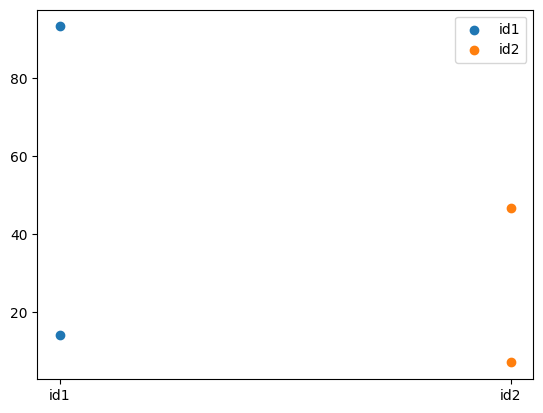

In [16]:
import matplotlib.pyplot as plt

plt.scatter([0]*len(id1), id1, label="id1")
plt.scatter([1]*len(id2), id2, label="id2")
plt.xticks([0, 1], ["id1", "id2"])
plt.legend()
plt.show()
